In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [2]:
# Load dataset.
df_input = pd.read_csv('./data/train.csv')
dummy = df_input.pop('Id')

In [3]:
df_input.describe()

,OverallQual,GrLivArea,GarageArea,SalePrice
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.125000,1510.493000,473.350000,182284.451000
std,1.383217,512.296179,208.901597,80291.215207
min,1.000000,334.000000,0.000000,34900.000000
25%,5.000000,1125.750000,338.000000,130000.000000
50%,6.000000,1456.000000,480.000000,163995.000000
75%,7.000000,1774.250000,576.000000,215000.000000
max,10.000000,4676.000000,1390.000000,755000.000000


In [4]:
df_input.head()

,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
0,1Fam,7,1710,548,208500
1,1Fam,6,1262,460,181500
2,1Fam,7,1786,608,223500
3,1Fam,7,1717,642,140000
4,1Fam,8,2198,836,250000


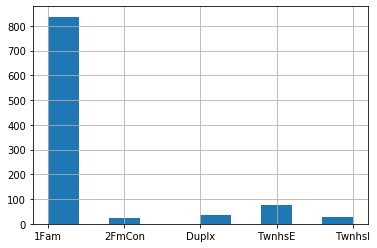

In [5]:
df_input.BldgType.hist()

1FAM is dominant category

In [6]:
encoder = ce.OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(df_input)
df_encoded.head()

,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,OverallQual,GrLivArea,GarageArea,SalePrice
0,1,0,0,0,0,7,1710,548,208500
1,1,0,0,0,0,6,1262,460,181500
2,1,0,0,0,0,7,1786,608,223500
3,1,0,0,0,0,7,1717,642,140000
4,1,0,0,0,0,8,2198,836,250000


In [7]:
df_test = pd.read_csv('./data/test.csv')
dummy = df_test.pop('Id')
df_test.describe()

,OverallQual,GrLivArea,GarageArea
count,259.000000,259.000000,259.000000
mean,6.081081,1548.030888,475.467181
std,1.379947,560.911287,219.228602
min,3.000000,630.000000,0.000000
25%,5.000000,1148.000000,336.000000
50%,6.000000,1513.000000,484.000000
75%,7.000000,1844.000000,574.000000
max,10.000000,5642.000000,1418.000000


In [8]:
219.228602 ** 2

48061.1799348744

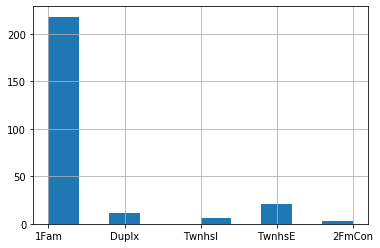

In [9]:
df_test.BldgType.hist()

In [10]:
df_test.shape[0]

259

In [11]:
result = pd.read_csv('./data/submission.csv')
saleprice = result.pop('SalePrice')
test_data = pd.read_csv('./data/test.csv')
test_data['SalePrice'] = saleprice

In [12]:
expensive_idx = test_data['SalePrice'] > 250000
expensive = test_data[expensive_idx]

In [13]:
expensive.describe()

,Id,OverallQual,GrLivArea,GarageArea,SalePrice
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1339.378378,8.054054,2187.729730,810.216216,325420.486486
std,65.033475,1.052667,773.857963,158.931525,88107.443621
min,1206.000000,6.000000,1236.000000,520.000000,253507.000000
25%,1303.000000,8.000000,1702.000000,722.000000,275805.000000
50%,1331.000000,8.000000,1980.000000,779.000000,297524.000000
75%,1387.000000,9.000000,2526.000000,850.000000,345881.000000
max,1452.000000,10.000000,5642.000000,1418.000000,767263.000000


In [14]:
GarageArea_idx = expensive['GarageArea'] > 700
gar = expensive[GarageArea_idx]
gar.describe()

,Id,OverallQual,GrLivArea,GarageArea,SalePrice
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1335.000000,8.233333,2097.966667,852.533333,335200.766667
std,66.633325,1.006302,814.337577,144.043991,94515.714444
min,1206.000000,6.000000,1236.000000,701.000000,258278.000000
25%,1300.000000,8.000000,1661.250000,755.000000,292174.000000
50%,1322.000000,8.000000,1898.500000,829.500000,313398.500000
75%,1375.750000,9.000000,2166.000000,886.250000,348433.250000
max,1452.000000,10.000000,5642.000000,1418.000000,767263.000000


In [15]:
GrLivArea_idx = expensive['GrLivArea'] > 2000
grliv = expensive[GrLivArea_idx]
grliv.describe()

,Id,OverallQual,GrLivArea,GarageArea,SalePrice
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1335.352941,8.235294,2730.823529,794.000000,359354.764706
std,68.559227,1.300452,850.037737,214.553606,120225.104795
min,1206.000000,6.000000,2007.000000,520.000000,253507.000000
25%,1299.000000,8.000000,2196.000000,666.000000,275805.000000
50%,1329.000000,8.000000,2555.000000,750.000000,345881.000000
75%,1387.000000,9.000000,2792.000000,844.000000,364176.000000
max,1443.000000,10.000000,5642.000000,1418.000000,767263.000000


In [16]:
OverallQual_idx = expensive['OverallQual'] > 8
qual = expensive[OverallQual_idx]
qual.describe()

,Id,OverallQual,GrLivArea,GarageArea,SalePrice
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1322.600000,9.400000,2405.500000,882.900000,381203.100000
std,68.127658,0.516398,1186.044992,207.360368,138378.550279
min,1229.000000,9.000000,1652.000000,746.000000,297524.000000
25%,1275.750000,9.000000,1804.500000,772.250000,316375.000000
50%,1310.000000,9.000000,2012.500000,808.000000,348238.500000
75%,1370.500000,10.000000,2468.250000,847.500000,362551.250000
max,1443.000000,10.000000,5642.000000,1418.000000,767263.000000


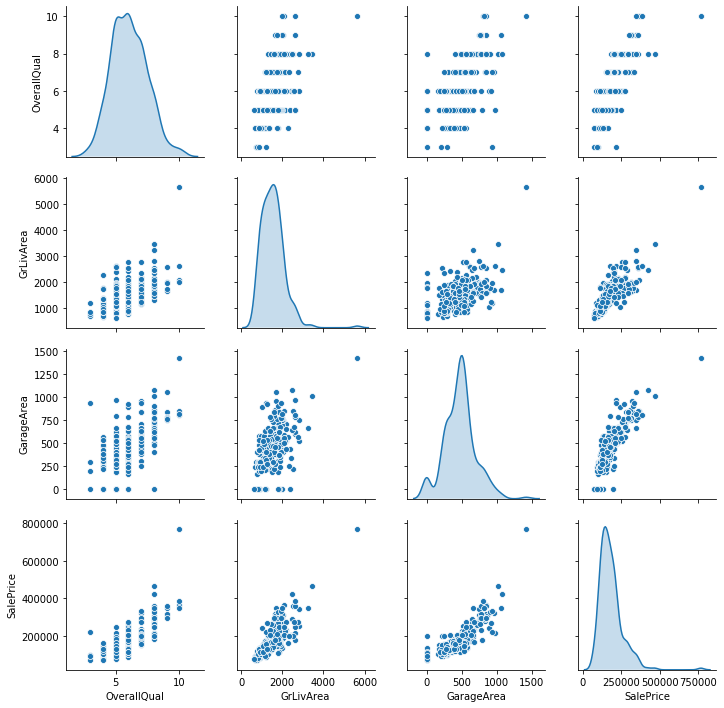

In [17]:
import seaborn as sns
sns.pairplot(test_data[["OverallQual", "GrLivArea", "GarageArea", "SalePrice"]], diag_kind="kde")